<br>

# Introdução

In [1]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
from paths import *

<br>

## Read Data

In [3]:
df = pd.read_csv(
    os.path.join(output_path_tab, 'tab_daee.csv')
)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188278 entries, 0 to 188277
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cod_bacia                188278 non-null  int64  
 1   nome_rio_aquifero        146691 non-null  object 
 2   cod_rio_poco             133770 non-null  object 
 3   dist_foz_km              188278 non-null  float64
 4   usuario                  188267 non-null  object 
 5   autos_daee               188278 non-null  int64  
 6   uso                      188278 non-null  object 
 7   seq                      188278 non-null  int64  
 8   finalidade_uso           175722 non-null  object 
 9   situacao_administrativa  176579 non-null  object 
 10  vazao_m3h                188278 non-null  float64
 11  hora_dia                 188278 non-null  int64  
 12  dia_mes                  188278 non-null  int64  
 13  mes_ano                  188278 non-null  int64  
 14  utm_

/tmp/ipykernel_34557/1725812218.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,cod_bacia,nome_rio_aquifero,cod_rio_poco,dist_foz_km,usuario,autos_daee,uso,seq,finalidade_uso,situacao_administrativa,...,hora_dia,dia_mes,mes_ano,utm_norte_km,utm_leste_km,utm_mc,utm_norte_m,utm_leste_m,erro_data,erro_coordenada
0,5,NaN,NaN,0.0,PUBLICO,35010,CAPTACAO SUBTERRANEA,1,NaN,NaN,...,12,0,0,0.0,0.0,0,0,0,NaN,Erro na coordenada
1,6,NaN,NaN,0.0,PUBLICO,34843,LANCAMENTO SUPERFICIAL,1,NaN,NaN,...,0,0,0,0.0,0.0,0,0,0,NaN,Erro na coordenada
2,8,NaN,NaN,0.0,PUBLICO,9200002,CAPTACAO SUBTERRANEA,1,AB.PUBL,LICENCA OPERACAO,...,20,0,0,0.0,0.0,0,0,0,NaN,Erro na coordenada
3,5,NaN,NaN,0.0,PUBLICO,9701259,CAPTACAO SUBTERRANEA,1,NaN,NaN,...,20,0,0,0.0,0.0,0,0,0,NaN,Erro na coordenada
4,5,FORMACAO ADAMANTINA,NaN,0.0,PUBLICO,9405973,CAPTACAO SUBTERRANEA,1,AB.PUBL,LIC PERFURACAO,...,0,0,0,7622.3,570.2,51,7622300,570200,NaN,NaN


<br>

## Dados Espaciais

In [4]:
# Exclui Problemas
df = df[df['erro_data'].isna()]
df = df[df['erro_coordenada'].isna()]

{51, 45}


<AxesSubplot:>

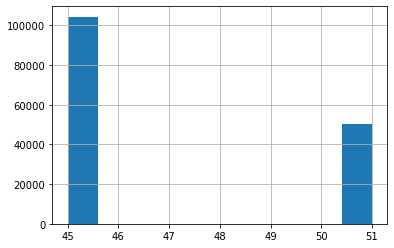

In [5]:
# Checa Resultados
print(set(df['utm_mc']))
df['utm_mc'].hist()

<br>

## Concatena

In [6]:
df_22 = df[df['utm_mc'] == 51]

geo_22 = [Point(xy) for xy in zip(df_22['utm_leste_m'], df_22['utm_norte_m'])]
gdf_22 = gpd.GeoDataFrame(
    df_22,
    crs='EPSG:31982',
    geometry=geo_22,
)

gdf_22 = gdf_22.to_crs(epsg=4326)

In [7]:
df_23 = df[df['utm_mc'] == 45]

geo_23 = [Point(xy) for xy in zip(df_23['utm_leste_m'], df_23['utm_norte_m'])]
gdf_23 = gpd.GeoDataFrame(
    df_23,
    crs='EPSG:31983',
    geometry=geo_23,
)

gdf_23 = gdf_23.to_crs(epsg=4326)

In [8]:
gdf = gpd.GeoDataFrame(
    pd.concat([gdf_22, gdf_23],
    ignore_index=True),
    crs=gdf_22.crs
)

<br>

## Estado

In [9]:
datageo_path = os.path.join('~', 'Codes', 'open_geodata', 'sp_datageo')
datageo_path_data = os.path.join(datageo_path, 'data', 'output')
datageo_path_data

'~/Codes/open_geodata/sp_datageo/data/output'

In [10]:
gdf_sp = gpd.read_file(
    os.path.join(datageo_path_data, 'sp_datageo_limite_estadual.gpkg')
)
gdf_sp = gdf_sp.to_crs(epsg=3395)
gdf_sp['geometry'] = gdf_sp['geometry'].buffer(1000)
gdf_sp = gdf_sp.to_crs(epsg=4326)
#gdf_sp.explore()

<AxesSubplot:>

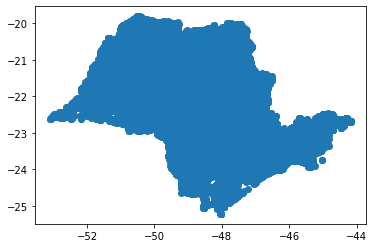

In [11]:
gdf_outorgas = gpd.clip(gdf, gdf_sp)
gdf_outorgas.plot()

<br>

## Salva arquivo

In [12]:
gdf_outorgas.to_file(
    os.path.join(output_path_geo, 'outorgas.gpkg'),
    layer='outorgas',
    driver='GPKG'
)

/home/michel/Documents/conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
